In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

import warnings
warnings.filterwarnings('ignore')


In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [86]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [87]:
df.shape

(32560, 15)

In [88]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset contains 1 target variable (Income) and 14 features out of which 9 column are objects and 6 are integer

In [90]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


as we can see variation in mean we have to scale the data, in count row, we confirm there is no null

In [91]:
df.duplicated().sum()

24

In [92]:
#checking any blank spaces
df.eq(' ').sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we have seen duplicate values, will check 

In [93]:
for column in df:
    print(column,  df[column].unique(), '\n\n')

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302] 


Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 


Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fi

we observed Question mark in ocupation and native country column

In [94]:
df.loc[df.Native_country == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [95]:
df.loc[df.Occupation == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


From the above observation we see that, Native counrty has 583 and ocupation has 1843 rows having ?. We will drop this rows as we have large number of data

In [96]:
df.drop(df[df['Native_country'] == ' ?'].index, inplace=True)

In [97]:
df.drop(df[df['Occupation'] == ' ?'].index, inplace=True)

In [98]:
for column in df:
    print(column,':- \n',  df[column].unique(), '\n\n')

Age :- 
 [50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86] 


Workclass :- 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] 


Fnlwgt :- 
 [ 83311 215646 234721 ...  84661 257302 201490] 


Education :- 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] 


Education_num :- 
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2] 


Marital_status :- 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Occupation :- 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing'

Now we can see there is no ? present in the dataset

Now we will Visualize the data

Checking count of income

<AxesSubplot:>

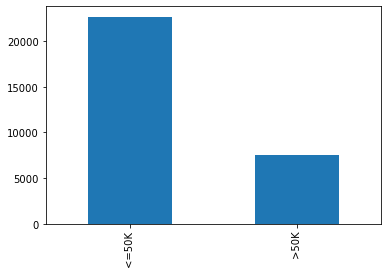

In [99]:
df['Income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

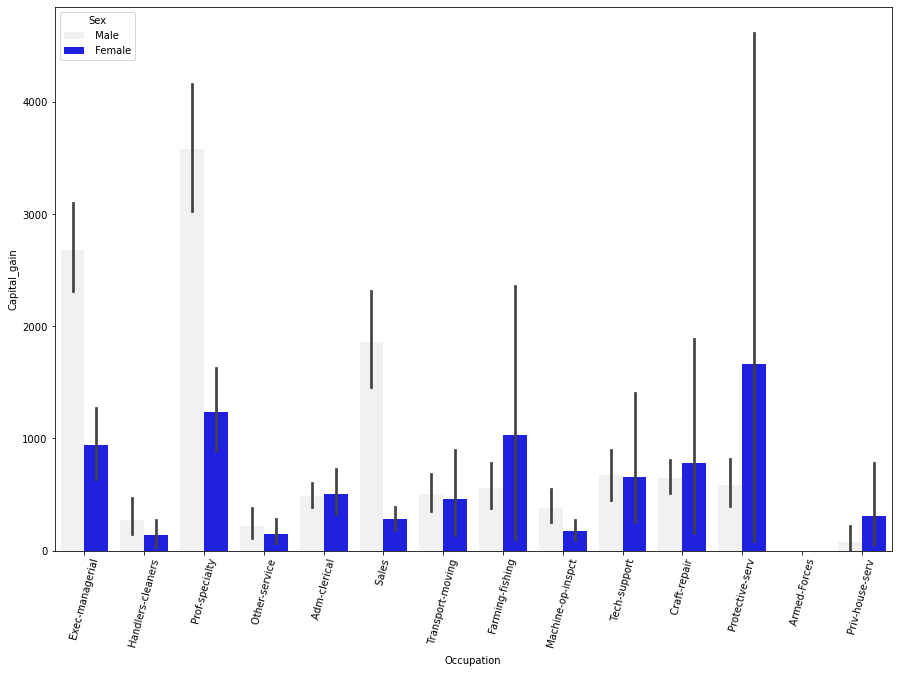

In [100]:
# Checking occupation vs capital gain for both the gender
plt.figure(figsize=(15,10))
sns.barplot(x = 'Occupation', y = 'Capital_gain', data=df, hue='Sex', color='b' )
plt.xticks(rotation=75)

for craft-repair, protective-serv, priv-house-serv Female ruling the industry with high capital gain, for rest male having more capital gain than female

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' 7th-8th'),
  Text(8, 0, ' Doctorate'),
  Text(9, 0, ' Assoc-voc'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' Preschool'),
  Text(14, 0, ' 12th'),
  Text(15, 0, ' 1st-4th')])

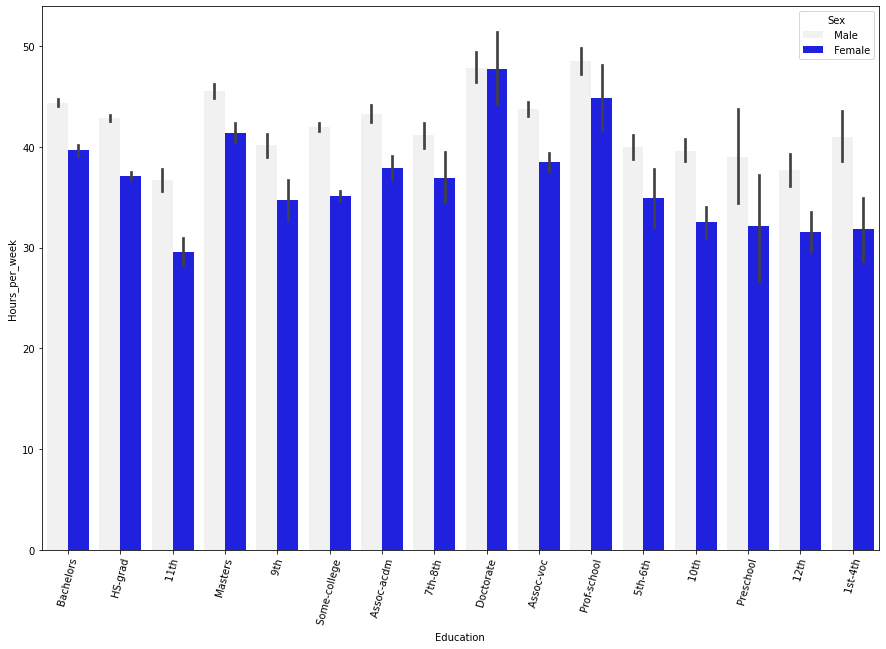

In [101]:
# Checking Education vs hours per week gain for both the gender
plt.figure(figsize=(15,10))
sns.barplot(x = 'Education', y = 'Hours_per_week', data=df, hue='Sex', color='b' )
plt.xticks(rotation=75)

High working hour for educations are Doctorate and prof-school where male and female contributing equally

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

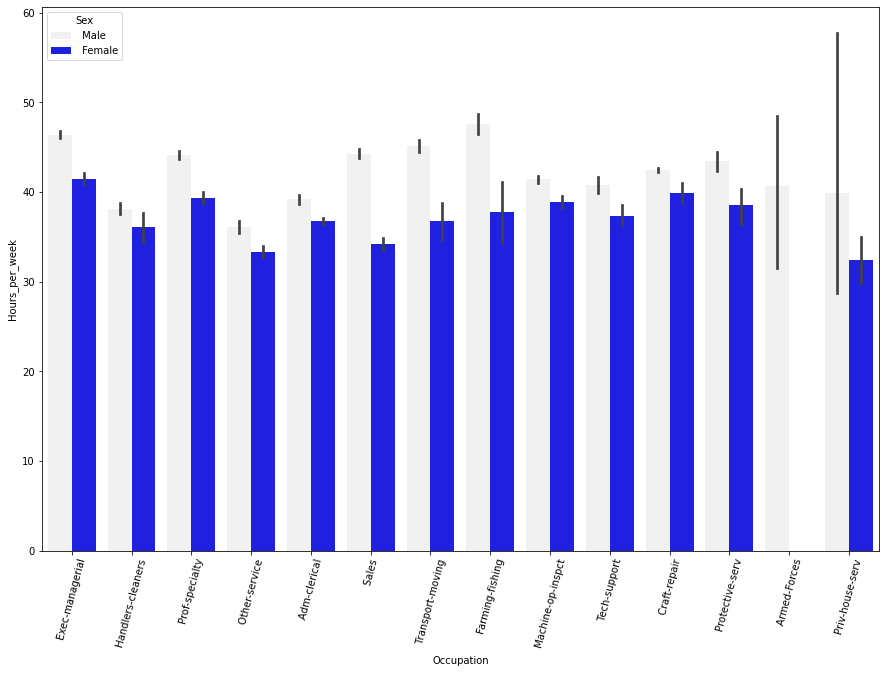

In [102]:
# Checking Occupation vs hours per week gain for both the gender
plt.figure(figsize=(15,10))
sns.barplot(x = 'Occupation', y = 'Hours_per_week', data=df, hue='Sex', color='b' )
plt.xticks(rotation=75)

Transport moving, armed forces are the more working hours occupation than others 

# Encoding

In [103]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Workclass
Education
Marital_status
Occupation
Relationship
Race
Sex
Native_country
Income


In [104]:
le = LabelEncoder()

In [105]:
Workclass_encoding = le.fit_transform(df['Workclass'])
Workclass_encoding

array([4, 2, 2, ..., 2, 2, 3])

In [106]:
Education_encoding = le.fit_transform(df['Education'])
Education_encoding 

array([ 9, 11,  1, ..., 11, 11, 11])

In [107]:
Marital_status_encoding = le.fit_transform(df['Marital_status'])
Marital_status_encoding 

array([2, 0, 2, ..., 6, 4, 2])

In [108]:
Occupation_encoding = le.fit_transform(df['Occupation'])
Occupation_encoding

array([3, 5, 5, ..., 0, 0, 3])

In [109]:
Relationship_encoding = le.fit_transform(df['Relationship'])
Relationship_encoding

array([0, 1, 0, ..., 4, 3, 5])

In [110]:
Race_encoding = le.fit_transform(df['Race'])
Race_encoding

array([4, 4, 2, ..., 4, 4, 4])

In [111]:
Sex_encoding = le.fit_transform(df['Sex'])
Sex_encoding

array([1, 1, 1, ..., 0, 1, 0])

In [112]:
Native_country_encoding = le.fit_transform(df['Native_country'])
Native_country_encoding

array([38, 38, 38, ..., 38, 38, 38])

In [113]:
Income_encoding = le.fit_transform(df['Income'])
Income_encoding

array([0, 0, 0, ..., 0, 0, 1])

In [114]:
df['Workclass'] = Workclass_encoding
df['Education'] = Education_encoding
df['Marital_status'] = Marital_status_encoding
df['Occupation'] = Occupation_encoding
df['Relationship'] = Relationship_encoding
df['Race'] = Race_encoding
df['Sex'] = Sex_encoding
df['Native_country'] = Native_country_encoding
df['Income'] =Income_encoding

In [115]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [116]:
df.shape

(30161, 15)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30161 non-null  int64
 1   Workclass       30161 non-null  int32
 2   Fnlwgt          30161 non-null  int64
 3   Education       30161 non-null  int32
 4   Education_num   30161 non-null  int64
 5   Marital_status  30161 non-null  int32
 6   Occupation      30161 non-null  int32
 7   Relationship    30161 non-null  int32
 8   Race            30161 non-null  int32
 9   Sex             30161 non-null  int32
 10  Capital_gain    30161 non-null  int64
 11  Capital_loss    30161 non-null  int64
 12  Hours_per_week  30161 non-null  int64
 13  Native_country  30161 non-null  int32
 14  Income          30161 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.7 MB


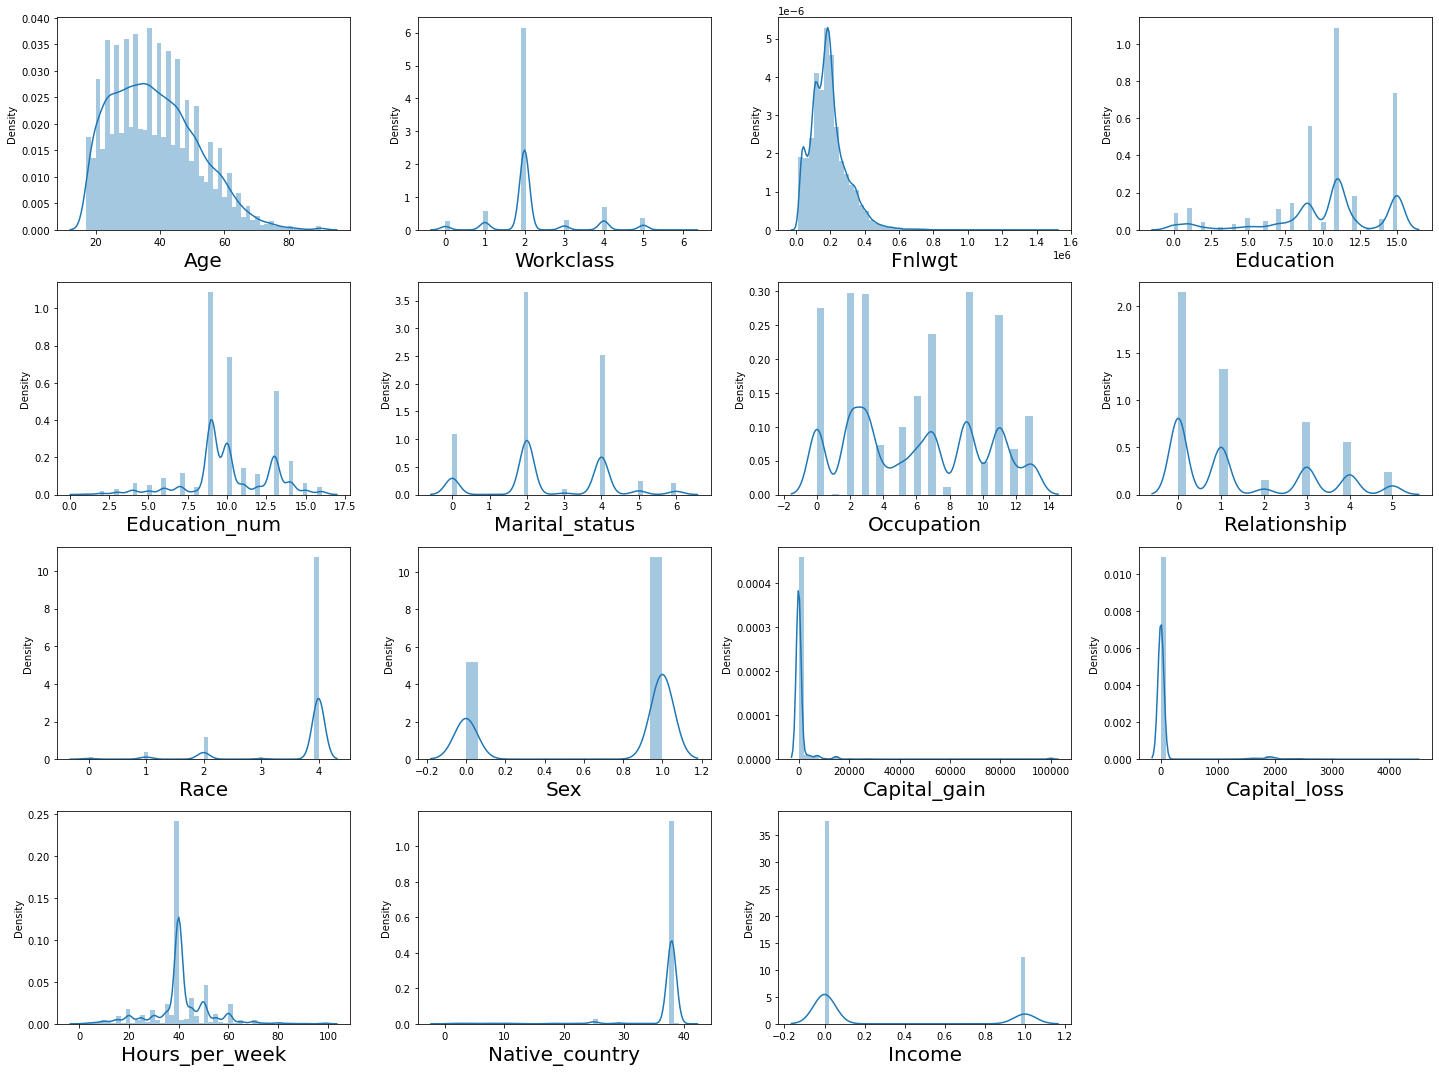

In [118]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

Some of the interger columns data is not normally distributed, We will use power transformation with standard scaler = True

In [119]:
#from sklearn.preprocessing import PowerTransformer, power_transform

In [120]:
#df_new = power_transform(df)

In [121]:
#df = pd.DataFrame(df_new, columns=df.columns)

In [122]:
#df

<AxesSubplot:>

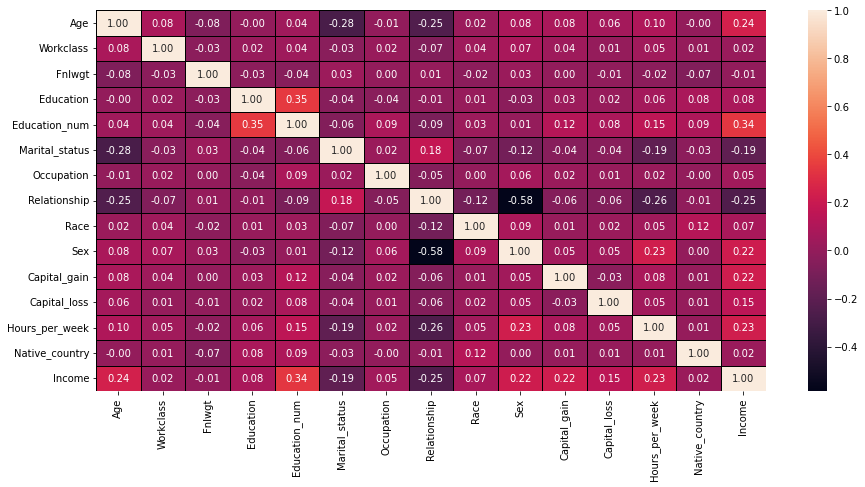

In [123]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [124]:
df.corr()['Income']

Age               0.242000
Workclass         0.018103
Fnlwgt           -0.008978
Education         0.078981
Education_num     0.335317
Marital_status   -0.193504
Occupation        0.051551
Relationship     -0.251009
Race              0.071666
Sex               0.216715
Capital_gain      0.221200
Capital_loss      0.150050
Hours_per_week    0.229480
Native_country    0.023273
Income            1.000000
Name: Income, dtype: float64

We observed, Workclass has very negligible relation with our target variable income, lets check with VIF

Variance Indlation Factor

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = variance_inflation_factor

In [126]:
v = df.drop('Income',axis=1)

In [127]:
vif_data=pd.DataFrame()
vif_data['Feature']=v.columns

In [128]:
vif_data['VIF']=[variance_inflation_factor(v.values,i)
                    for i in range(len(v.columns))]
    
print(vif_data)

           Feature        VIF
0              Age   9.420858
1        Workclass   6.250465
2           Fnlwgt   4.031440
3        Education   9.420696
4    Education_num  19.078857
5   Marital_status   4.016788
6       Occupation   3.204963
7     Relationship   2.620331
8             Race  18.446525
9              Sex   4.591498
10    Capital_gain   1.045863
11    Capital_loss   1.063007
12  Hours_per_week  13.022566
13  Native_country  28.474831


all columns are equally co-related with income so we will not drop worksclass column

# Model Building

In [129]:
x = df.drop(columns=['Income'], axis=1)
y = df['Income']

# Logistic Regression

In [130]:
lr=LogisticRegression()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred_test = lr.predict(x_test)
    y_pred_train = lr.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.802280864606816 Max Random State 23


# Random Forest Classifier

In [131]:
rf=RandomForestClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8607611722583212 Max Random State 132


# Decision Tree

In [132]:
dt=DecisionTreeClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    dt.fit(x_train,y_train)
    y_pred_test = dt.predict(x_test)
    y_pred_train = dt.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8140830128630155 Max Random State 7


# K Neighbors Classifier

In [133]:
knn = KNeighborsClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    knn.fit(x_train,y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.778013526057552 Max Random State 116


We observed maximum score for Random Forest Classifier and Decision Tree Classifier, Will hypertune both model

Random Forest

In [134]:
gcv = GridSearchCV

In [135]:
params = {
    'max_features': ['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],
         'criterion':['gini','entropy'],
         "n_estimators":[10,50,120,350]
         }

In [136]:
hypt = gcv(rf, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 120}

In [137]:
rf = RandomForestClassifier(n_estimators=10, max_depth=8, max_features= 'log2', criterion='gini')

In [138]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print('Max Accuracy', maxAcc, 'Max Random State', maxRS)

Max Accuracy 0.8583268869488341 Max Random State 22


# Score Report of the Model

In [139]:
#Testing Report
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6833
           1       0.78      0.54      0.64      2216

    accuracy                           0.85      9049
   macro avg       0.82      0.75      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [140]:
#Training Report
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     15820
           1       0.82      0.56      0.66      5292

    accuracy                           0.86     21112
   macro avg       0.84      0.76      0.79     21112
weighted avg       0.85      0.86      0.85     21112



# Confusion Matrix

<AxesSubplot:>

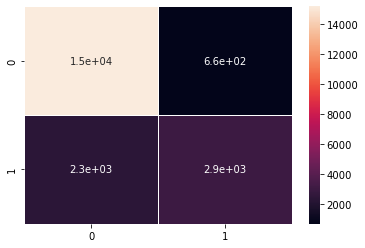

In [141]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmtrain, annot = True, linewidth=0.5)

<AxesSubplot:>

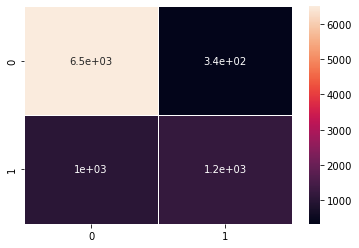

In [142]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

Decision Tree

In [143]:
params = {
    'max_features': ['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],
         'criterion':['gini','entropy'],
         "min_samples_leaf":[1,2]
         }

In [144]:
hypt = gcv(dt, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2}

In [145]:
dt = DecisionTreeClassifier(min_samples_leaf=2, max_depth=8, max_features= 'sqrt', criterion='entropy')

In [146]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    dt.fit(x_train,y_train)
    y_pred_test = dt.predict(x_test)
    y_pred_train = dt.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print('Max Accuracy', maxAcc, 'Max Random State', maxRS)

Max Accuracy 0.8490440932699745 Max Random State 41


In [147]:
#Testing Report
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6833
           1       0.76      0.53      0.63      2216

    accuracy                           0.84      9049
   macro avg       0.81      0.74      0.76      9049
weighted avg       0.84      0.84      0.83      9049



In [148]:
#Training Report
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15820
           1       0.79      0.54      0.64      5292

    accuracy                           0.85     21112
   macro avg       0.83      0.75      0.77     21112
weighted avg       0.84      0.85      0.84     21112



# Confusion Matrix

<AxesSubplot:>

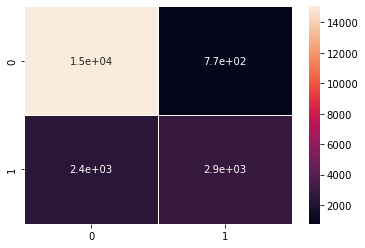

In [149]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmtrain, annot = True, linewidth=0.5)

<AxesSubplot:>

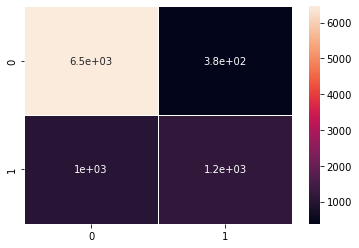

In [150]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

# AUC ROC curve

In [151]:
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import plot_roc_curve

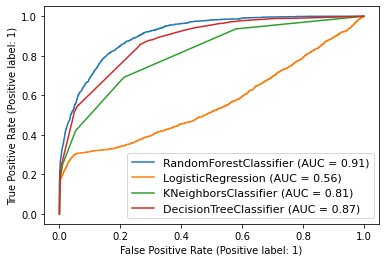

In [152]:
disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)


plt.legend(prop = {'size':11}, loc ='lower right')

From the above ROC AUC curve, We got more AUC ofr Decision Tree Classifier but accuracy is more for Random FOrest Classifier, SO we will save both the model and accordingly for any future sue, we will use both and check the score. accordingly we will train the model

# Saving Model

In [153]:
import pickle

In [154]:
pickle.dump('rf', open('Randomforest_model_for_income_prediction', 'wb'))

In [155]:
pickle.dump('dt', open('DecisionTreeClassifier_model_for_income_prediction', 'wb'))